## Importando os dados que iremos utilizar

#### Dados com a coluna de possibilidade menor que 2, para realizar um modelo melhor.

In [1]:
import pandas as pd
import numpy as np


dados = pd.read_pickle("dados\dados_tratados")
dados = dados.drop(
    columns=["infection.county", "occupation", "data", "detection.numerico"]
)  # deletando dados que não vão ser utilizados
dados = dados.reindex()  # apenas para ter certezar que os index estão corretos
logic = dados["probabilidade"] < 2
dados = dados.loc[logic]

## Agora podemos começar a trabalhar com os dados

Primeiro vamos normalizar os dados utilizando o sklearn

In [2]:
from sklearn.preprocessing import StandardScaler

FEATURES = [
    "populacao",
    "latitude",
    "longitude",
    "agriculture",
    "domestic worker",
    "grazing",
    "hunting and fishing",
    "ignored",
    "mining",
    "other",
    "panning",
    "road construction",
    "tourism",
    "traveler",
    "vegetal exploitation",
]
TARGET = ["probabilidade"]
sc = StandardScaler()
dados_normalizados = sc.fit_transform(dados[FEATURES].values)
# sc.fit(dados)
# dados_normalizados = sc.transform(dados[FEATURES])
print(np.shape(dados_normalizados))

(23228, 15)


Depois de normalizado podemos rodar o PCA, que também é do sklearn

In [3]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(dados_normalizados)
dados_pca = pca.transform(dados_normalizados)

Agora podemos plotar os dados depois de utilizar o PCA para assim ser possivel analizar o PCA.

(-2.83099209406188, 8.137943485009874, -2.590070091974742, 2.4487162691361077)

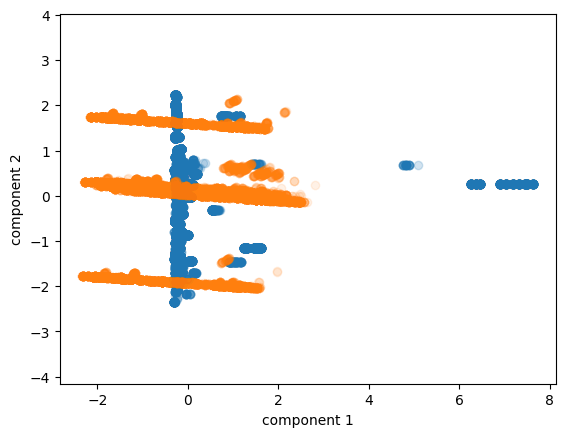

In [4]:
import matplotlib.pyplot as plt

plt.scatter(dados_normalizados[:, 0], dados_normalizados[:, 1], alpha=0.2)
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], alpha=0.1)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.axis("equal")

Para melhorar a visualização iremos colorir o grafico em função da probabilidade.

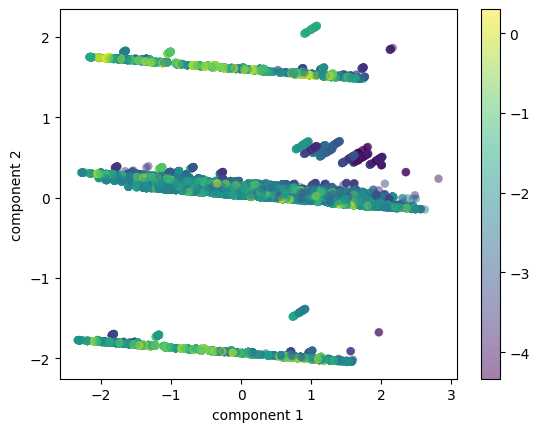

In [5]:
plt.scatter(
    dados_pca[:, 0],
    dados_pca[:, 1],
    edgecolor="none",
    alpha=0.5,
    c=np.log10(dados["probabilidade"].values),
)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()
plt.show()

Para visualizar melhor os dados podemos plotar utilizando 3 relaçôes utilizando um grafico 3d

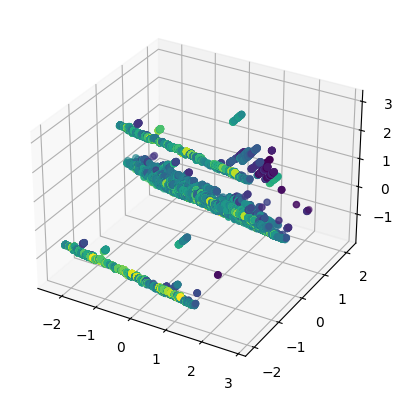

In [6]:
ax = plt.axes(projection="3d")
ax.scatter3D(
    dados_pca[:, 0],
    dados_pca[:, 1],
    dados_pca[:, 2],
    c=np.log10(dados["probabilidade"].values),
)
plt.show()

Podemos mostrar a tabela das combinações das features para enternder nosso PCA.

In [7]:
component_names = [f"PC{i+1}" for i in range(dados_pca.shape[1])]
dados_pca_df = pd.DataFrame(dados_pca, columns=component_names)
dados_pca_df.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=FEATURES,  # and the rows are the original features
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
populacao,0.127158,0.069065,0.175034,0.430997,-0.248299,-0.143807,-0.170873,-0.051306,0.139367,-0.051229,-0.046158,0.088864,0.781863,-0.071533,3.971662e-17
latitude,0.659767,-0.048495,-0.034505,-0.137152,0.022267,0.092150,-0.013805,-0.095102,-0.085934,-0.096818,-0.132254,-0.085476,-0.057384,-0.692303,-2.891886e-16
longitude,0.666282,-0.045608,-0.093955,-0.152894,-0.097696,-0.026786,0.023225,-0.067421,-0.039741,-0.040371,-0.095259,-0.006092,0.029445,0.702317,-7.290902e-17
agriculture,-0.132693,-0.759052,-0.402754,-0.091071,-0.103889,-0.026439,-0.075114,-0.047746,0.034610,-0.044469,-0.073326,0.006365,0.154562,-0.031642,4.275880e-01
domestic worker,-0.103875,0.065588,0.606612,-0.632992,-0.159858,-0.030820,-0.077178,-0.059517,0.030887,-0.050349,-0.089279,0.004236,0.132541,0.000804,3.888476e-01
grazing,-0.040302,0.029259,0.110898,0.254078,-0.064703,-0.223695,0.775660,-0.320181,-0.170590,-0.121349,-0.211626,-0.074238,-0.056362,-0.007249,2.547992e-01
hunting and fishing,0.113708,0.002488,0.120745,0.119356,0.887727,-0.165251,-0.089915,0.019685,0.101352,0.015009,-0.011326,0.044332,0.104104,0.057554,3.281123e-01
ignored,0.091507,0.002406,0.040048,0.060260,-0.055518,-0.013961,-0.009003,-0.143405,-0.153461,-0.396471,0.862861,0.038011,-0.041068,-0.002292,1.845451e-01
mining,0.058991,0.012470,0.049085,0.132334,-0.119660,-0.097824,-0.112649,-0.074397,0.137608,-0.090405,-0.135017,0.878722,-0.321915,-0.038176,1.084089e-01
other,-0.065112,0.637941,-0.592139,-0.162306,-0.070411,-0.013363,-0.064083,-0.040171,0.027937,-0.038629,-0.065789,0.001769,0.119740,-0.037960,4.225894e-01


Tendo as componentes podemos plotar o gráfico da variância explicada para entender melhor as componentes criadas e com isso verificando quanto cada componente representa dos dados reais.

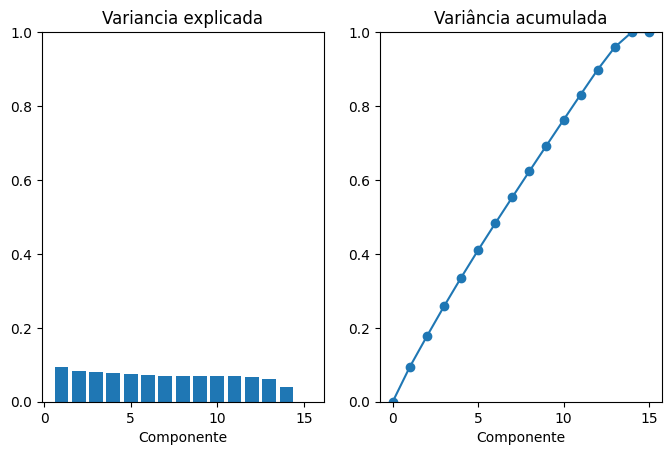

In [8]:
def plot_variance(pca):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Componente", title="Variancia explicada", ylim=(0.0, 1.0))

    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Componente", title="Variância acumulada", ylim=(0.0, 1.0))

    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs


# Graficar
plot_variance(pca)
plt.show()

### Como agora temos as componentes podemos utilizar para realizar regresão 
Primeiro temos que dividir em treino e teste, iramos utilizar log10 do TARGET, pois a grandeza é muito diferente.

In [9]:
from sklearn.model_selection import train_test_split

(
    X_treino,
    X_teste,
    y_treino,
    y_teste,
) = train_test_split(  # Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    dados_pca,  # Dados das componentes principais do PCA
    np.log10(dados[TARGET].values),  # Dados do target
    test_size=0.2,  # Tamanho do conjunto de teste
    random_state=41,
)  # Semente aleatória

Para melhor visualização podemos criar um dataframe com os dados e calcular a correlação.

In [10]:
df_pca_train = pd.DataFrame(
    dados_pca, columns=[f"PC{i+1}" for i in range(dados_pca.shape[1])]
)  # Define as colunas das PC em um dataframe, utilizando os dados do X_pca
df_pca_train["probabilidade"] = np.log10(
    dados[TARGET]
)  # Adiciona a coluna preço, com os dados de y
print(df_pca_train.head(10))  # Exibe as 10 primeiras linhas do dataset
corrmat = df_pca_train.corr()  # Cálculo da correlação
print(round(corrmat, 4))  # Exibe a correlação com 4 casas decimais

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.748655 -1.806284 -0.921967  0.018484 -0.231591 -0.211503 -0.116714   
1 -1.585534  0.219943  0.554433  1.315848 -0.243354 -1.086408  3.335191   
2 -1.481924 -1.807572 -0.883275  0.075082 -0.264927 -0.194780 -0.168357   
3 -1.435618  0.276375  1.798969 -1.441757 -0.445188 -0.213463 -0.192811   
4 -1.318803  0.218655  0.593125  1.372446 -0.276691 -1.069685  3.283548   
5 -0.777705  0.103677  0.521042  0.693396  2.896078 -0.668428 -0.273814   
6 -0.617647  0.109523  0.359172  0.653479 -0.326971 -0.209596 -0.032330   
7 -1.314413  1.713933 -1.375668 -0.108334 -0.183078 -0.162392 -0.142600   
8 -0.564906  0.132073  0.419622  0.900797 -0.659056 -0.607456 -0.471004   
9 -2.057152 -1.787772 -0.893524  0.069493 -0.192712 -0.208962 -0.115893   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.096455  0.225203  0.104002  0.120253  0.165842  0.291894  1.183468   
1 -1.130989 -0.579324 -0

Apenas para fim de comparação será calculada a baseline

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, max_error
from math import sqrt

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(X_treino, y_treino)
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(10**y_verdadeiro, 10**y_previsao, squared=False)
RRMSE = RMSE / sqrt(sum((10**y_previsao) ** 2))
erro_maximo = max_error(10**y_verdadeiro, 10**y_previsao)

print(f"O RRMSE do modelo baseline foi de {RRMSE} e o erro maximo foi {erro_maximo}.")

O RRMSE do modelo baseline foi de 0.18477524665426664 e o erro maximo foi 1.9512262682456505.


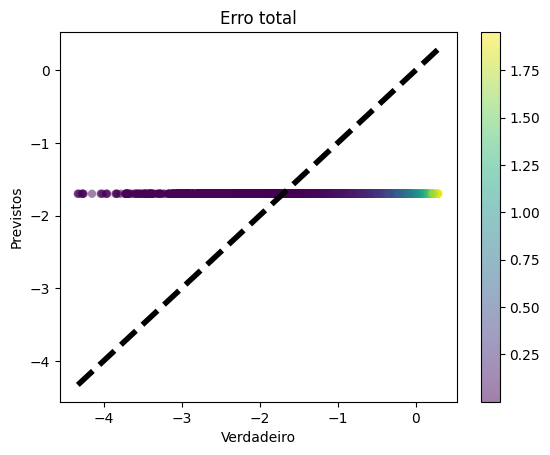

In [12]:
import matplotlib.pyplot as plt

erro = []

for index in range(len(y_previsao)):  # erro maximo função, tirado o log
    valor = abs(10 ** y_teste[index] - 10 ** y_previsao[index])
    erro.append(valor)


fig, ax = plt.subplots()
plt.scatter(y_verdadeiro, y_previsao, edgecolor="none", alpha=0.5, c=erro)
plt.colorbar()
ax.plot(
    [y_verdadeiro.min(), y_verdadeiro.max()],
    [y_verdadeiro.min(), y_verdadeiro.max()],
    "k--",
    lw=4,
)
ax.set_title("Erro total")
ax.set_xlabel("Verdadeiro")
ax.set_ylabel("Previstos")
plt.show()

Agora podemos treinar o modelo, utilizando o modelo já criado de floresta de decisão, para testar as PCAs como FEATURES

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from math import sqrt

lista_RRMSE = []
for i in range(1, 16):
    n_estimators, max_features, criterio = 58, None, "squared_error"
    modelo_rf = RandomForestRegressor(
        criterion=criterio,
        n_estimators=n_estimators,
        max_features=max_features,
        random_state=41,
        n_jobs=4,
    )
    modelo_rf.fit(X_treino[:, :i], y_treino.ravel())
    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste[:, :i])
    RMSE = mean_squared_error(10**y_verdadeiro, 10**y_previsao, squared=False)
    RRMSE = RMSE / sqrt(sum((10**y_previsao) ** 2))  # Fórmula do RRMSE
    erro_maximo = max_error(10**y_verdadeiro, 10**y_previsao)
    index_max = np.argmax(y_teste)
    valor_maior = 0
    print(
        f"O RRMSE do modelo com {i} componentes usando floresta de decisão foi de {RRMSE} e o erro maximo foi {erro_maximo}."
    )
    lista_RRMSE.append(RRMSE)

O RRMSE do modelo com 1 componentes usando floresta de decisão foi de 0.012128956504744898 e o erro maximo foi 1.839753573501938.
O RRMSE do modelo com 2 componentes usando floresta de decisão foi de 0.009641584169369175 e o erro maximo foi 1.7763977990784972.
O RRMSE do modelo com 3 componentes usando floresta de decisão foi de 0.009568847590228058 e o erro maximo foi 1.7790994323471998.
O RRMSE do modelo com 4 componentes usando floresta de decisão foi de 0.009578335045496556 e o erro maximo foi 1.8112951102141834.
O RRMSE do modelo com 5 componentes usando floresta de decisão foi de 0.009508273740008524 e o erro maximo foi 1.8719975538688718.
O RRMSE do modelo com 6 componentes usando floresta de decisão foi de 0.009487791165712267 e o erro maximo foi 1.762817236177906.
O RRMSE do modelo com 7 componentes usando floresta de decisão foi de 0.009461985469641093 e o erro maximo foi 1.806877644906674.
O RRMSE do modelo com 8 componentes usando floresta de decisão foi de 0.00942447361076

Analisando o RRMSE podemos perceber que se for comparado as componentes, não é necessário utilizar todas as componentes, 14 componentes é a melhor, porém poderiamos utilizar menos.

#### Agora podemos plotar o grafico com a melhor quantidade de componente.

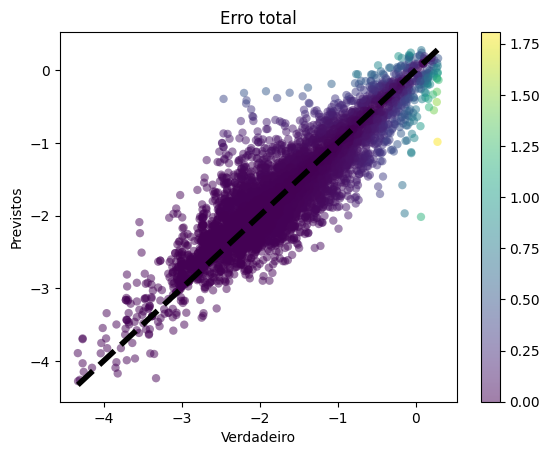

In [14]:
import matplotlib.pyplot as plt

n = np.argmin(lista_RRMSE)
n_estimators, max_features, criterio = 58, None, "squared_error"
modelo_rf = RandomForestRegressor(
    criterion=criterio,
    n_estimators=n_estimators,
    max_features=max_features,
    random_state=41,
    n_jobs=4,
)
modelo_rf.fit(X_treino[:, :n], y_treino.ravel())
y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste[:, :n])
erro = []
for index in range(
    len(y_previsao)
):  # erro maximo função, para descobrir se é sempre o mesmo valor que da o erro maximo.
    valor = abs(10 ** y_teste[index] - 10 ** y_previsao[index])
    erro.append(valor)


fig, ax = plt.subplots()
plt.scatter(y_verdadeiro, y_previsao, edgecolor="none", alpha=0.5, c=erro)
plt.colorbar()
ax.plot(
    [y_verdadeiro.min(), y_verdadeiro.max()],
    [y_verdadeiro.min(), y_verdadeiro.max()],
    "k--",
    lw=4,
)
ax.set_title("Erro total")
ax.set_xlabel("Verdadeiro")
ax.set_ylabel("Previstos")
plt.show()

# K-Means direto com o PCA

In [15]:
# Importação dos dados
from sklearn.cluster import KMeans

n_clusters = 12

kmeans = KMeans(
    n_clusters=n_clusters,
    init="random",
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0,
)

y_kmeans = kmeans.fit_predict(dados_pca)

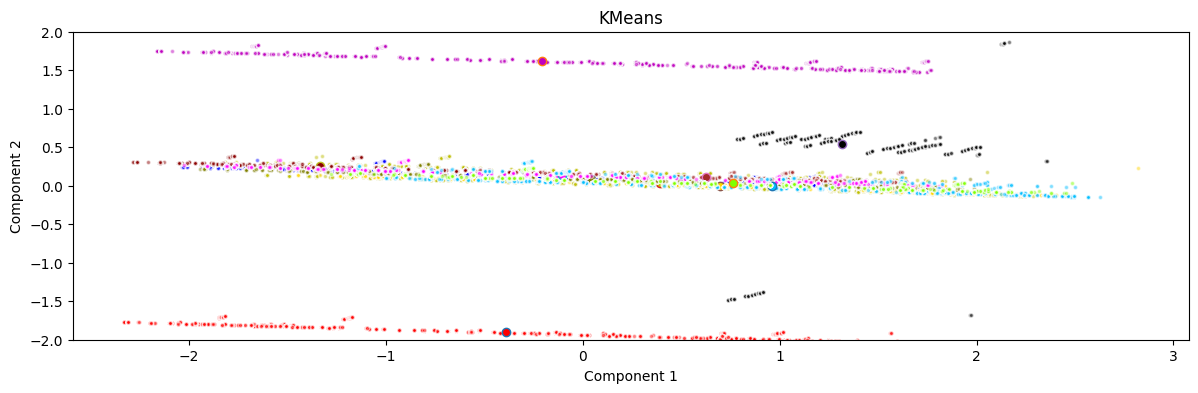

In [16]:
# Plotamos os dados em função das duas componentes principais:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(dados_pca, centroids)
colors = [
    "r",
    "m",
    "b",
    "y",
    "k",
    "gold",
    "brown",
    "olive",
    "darkred",
    "magenta",
    "deepskyblue",
    "chartreuse",
]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        dados_pca[my_members, 0],
        dados_pca[my_members, 1],
        "w",
        markerfacecolor=col,
        marker=".",
        alpha=0.5,
        linewidth=0,
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha=1.0,
        linewidth=0,
    )

ax.set_title("KMeans")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.ylim(-2, 2)
plt.show()

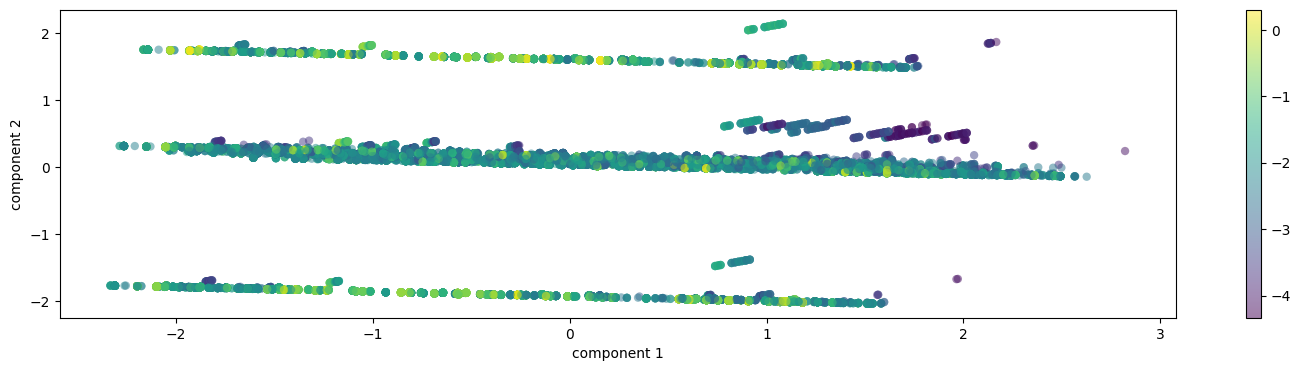

In [17]:
ig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(
    dados_pca[:, 0],
    dados_pca[:, 1],
    edgecolor="none",
    alpha=0.5,
    c=np.log10(dados["probabilidade"].values),
)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()
plt.show()

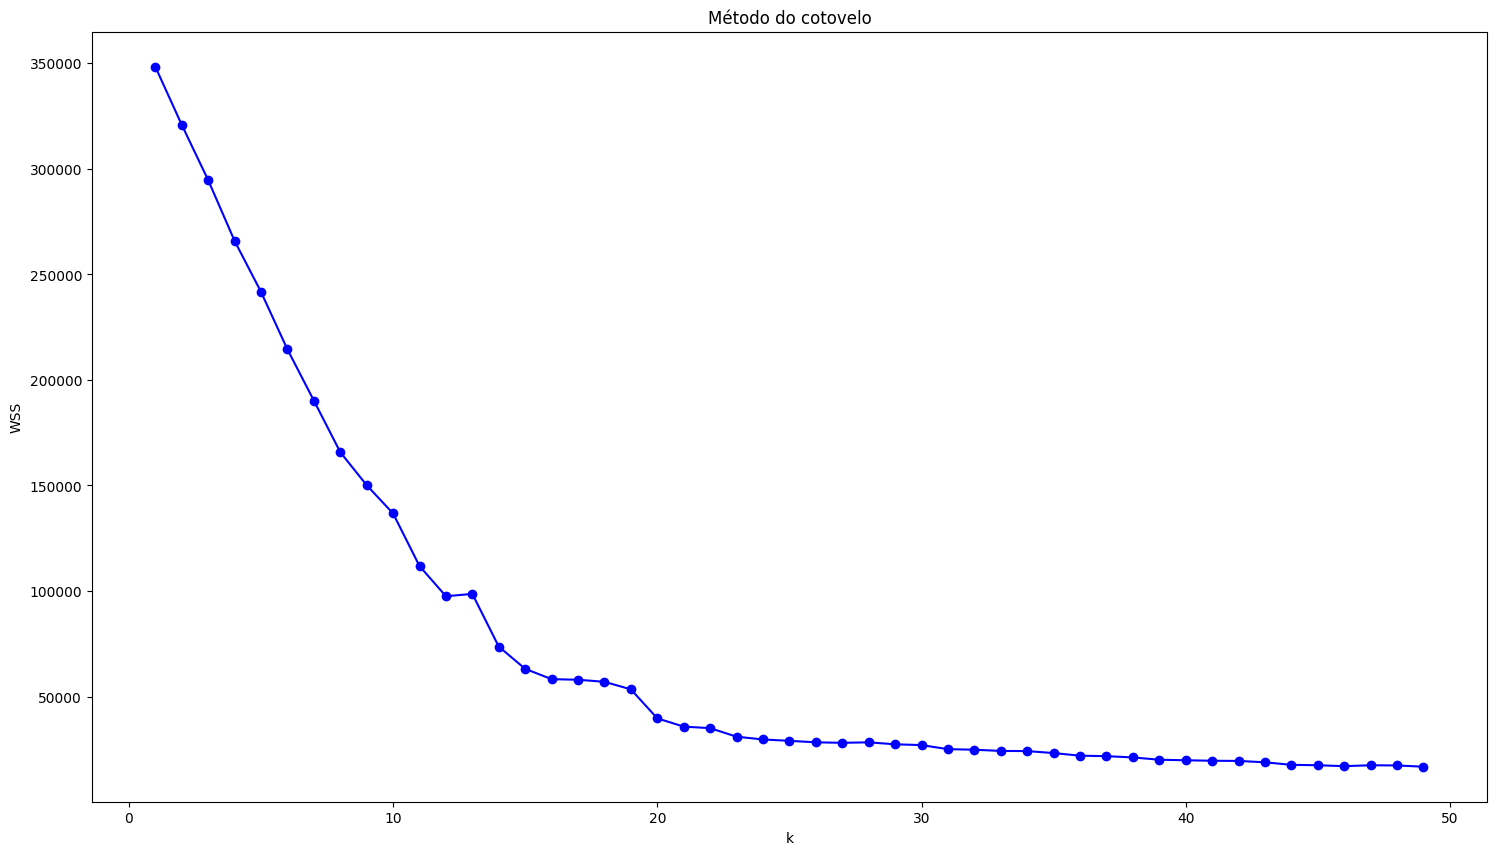

In [18]:
# Vamos realizar o método do cotovelo para sabermos qual cluster é o ideal

WSS = []  # Inicia uma lista vazia, para acumularmos valores.

for k in range(1, 50):  # Vamos fazer para 1 a 9 clusters.
    kmeans = KMeans(  # Inicializa o K-Means, como já explicado antes
        n_clusters=k, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    )
    y_kmeans = kmeans.fit_predict(dados_pca)  # Fita o K-Means
    WSS.append(kmeans.inertia_)  # Obtem a WSS e acumula na lista inicializada

plt.figure(figsize=(18, 10))  # Define o tamanho da figura
plt.plot(range(1, 50), WSS, "-bo")  # Define o plot
plt.xlabel("k")  # Nome da coordenada x
plt.ylabel("WSS")  # Nome da coordenada y
plt.title("Método do cotovelo")  # Título do gráfico
plt.show()  # Mostra o gráfico

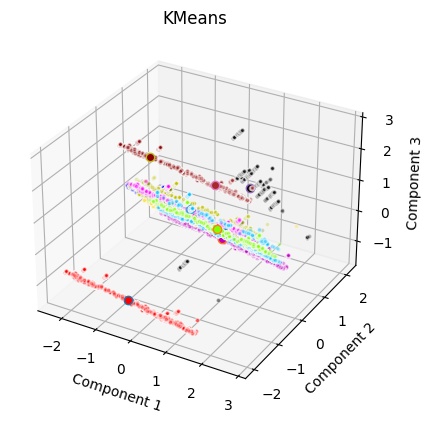

In [19]:
n_clusters = 12

kmeans = KMeans(
    n_clusters=n_clusters,
    init="random",
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0,
)

y_kmeans = kmeans.fit_predict(dados_pca)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(dados_pca, centroids)
colors = [
    "r",
    "m",
    "b",
    "y",
    "k",
    "gold",
    "brown",
    "olive",
    "darkred",
    "magenta",
    "deepskyblue",
    "chartreuse",
]

fig = plt.figure()  # figsize=(22, 10))
ax = fig.add_subplot(projection="3d")

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        dados_pca[my_members, 0],
        dados_pca[my_members, 1],
        dados_pca[my_members, 2],
        "w",
        markerfacecolor=col,
        marker=".",
        linewidth=0,
        alpha=0.3,
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        # markeredgecolor="k",
        markersize=6,
    )

ax.set_title("KMeans")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.show()

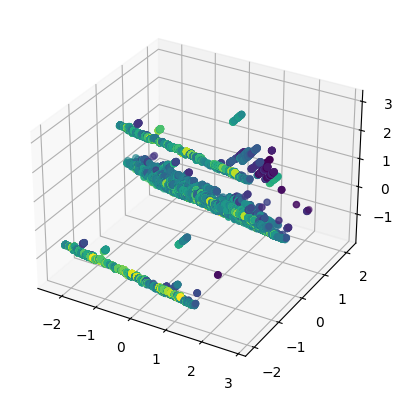

In [20]:
ax = plt.axes(projection="3d")
ax.scatter3D(
    dados_pca[:, 0],
    dados_pca[:, 1],
    dados_pca[:, 2],
    c=np.log10(dados["probabilidade"].values),
)
plt.show()

# BIRCH clustering algorithm

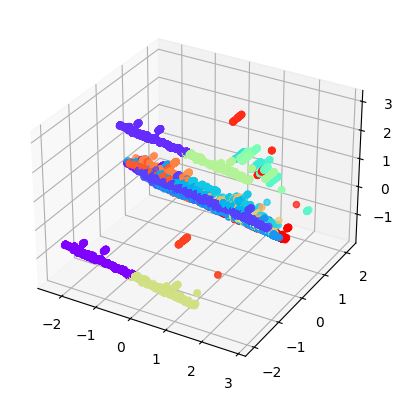

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

# Creating the BIRCH clustering model
model = Birch(branching_factor=50, n_clusters=None, threshold=1.5)

# Fit the data (Training)
model.fit(dados_pca)

# Predict the same data
pred = model.predict(dados_pca)

# Creating a scatter plot
ax = plt.axes(projection="3d")
ax.scatter3D(
    dados_pca[:, 0], dados_pca[:, 1], dados_pca[:, 2], c=pred, cmap="rainbow", alpha=0.7
)
plt.show()

Os dois apresentam algumas propriedades similares, podemos ver umas divisões diferentes dos ambos na mesma linha, como nessa mais a frente. O K-Means ainda se apresenta melhor, dado que consegue reconhecer um pouco mais de dados e parece agrupar de modo mais satisfatório.

# Detecção de valores anômalos por *Local Outlier Factor*

### Para *n_neighbors* = 10:

In [29]:
from sklearn.neighbors import LocalOutlierFactor

# Valor convencional do sklearn
N_VIZINHOS = 20

# Aqui que criamos o modelo de Local Outlier Factor
modelo_lof = LocalOutlierFactor(
    # Determinando o valor de 'vizinho'
    n_neighbors=10,
    contamination='auto',
)

In [30]:
# Selecionar os dados com valores adequados e pertinentes
dados_plot_dados = [dados_pca, dados["probabilidade"].values]

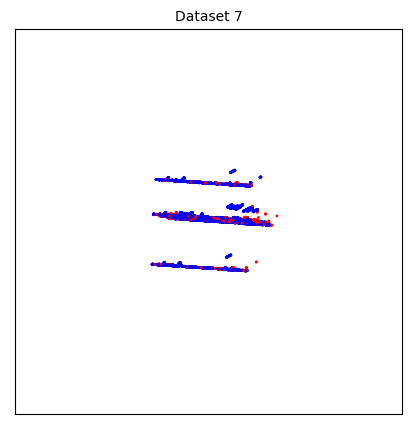

In [31]:
import numpy as np

CORES = np.array(["red", "blue"])

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_lof.fit(dados_plot_dados[0])
previsao = modelo_lof.fit_predict(dados_plot_dados[0])

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    dados_plot_dados[0][:, 0],
    dados_plot_dados[0][:, 1],
    marker=".",
    s=4,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset {n}", fontsize=10)

plt.show()

### Para *n_neighbors* = 20:

In [45]:
from sklearn.neighbors import LocalOutlierFactor

# Valor convencional do sklearn
N_VIZINHOS = 20

# Aqui que criamos o modelo de Local Outlier Factor
modelo_lof2 = LocalOutlierFactor(
    # Determinando o valor de 'vizinho'
    n_neighbors=20,
    contamination='auto',
)

In [46]:
# Selecionar os dados com valores adequados e pertinentes
dados_plot_dados = [dados_pca, dados["probabilidade"].values]

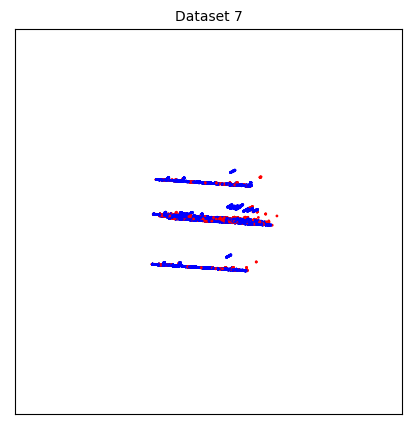

In [47]:
import numpy as np

CORES = np.array(["red", "blue"])

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_lof.fit(dados_plot_dados[0])
previsao = modelo_lof2.fit_predict(dados_plot_dados[0])

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    dados_plot_dados[0][:, 0],
    dados_plot_dados[0][:, 1],
    marker=".",
    s=4,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset {n}", fontsize=10)

plt.show()

### Para *n_neighbors* = 30:

In [48]:
from sklearn.neighbors import LocalOutlierFactor

# Valor convencional do sklearn
N_VIZINHOS = 20

# Aqui que criamos o modelo de Local Outlier Factor
modelo_lof2 = LocalOutlierFactor(
    # Determinando o valor de 'vizinho'
    n_neighbors=30,
    contamination='auto',
)

In [49]:
# Selecionar os dados com valores adequados e pertinentes
dados_plot_dados = [dados_pca, dados["probabilidade"].values]

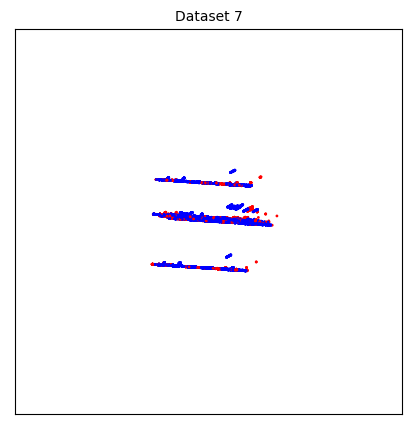

In [50]:
import numpy as np

CORES = np.array(["red", "blue"])

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_lof.fit(dados_plot_dados[0])
previsao = modelo_lof2.fit_predict(dados_plot_dados[0])

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    dados_plot_dados[0][:, 0],
    dados_plot_dados[0][:, 1],
    marker=".",
    s=4,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset {n}", fontsize=10)

plt.show()

### Comparando-os
Quando analisamos visualmente os resultados obtidos, percebemos que há diferenças sutis entre os distintos valores de *n_neighbors*. As diferenças são mais visíveis na distruição, no tamanho e na agregação dos pontos anômalos.

# Detecção de valores anômalos por *Isolation forest*

In [55]:
from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False

# Aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination='auto',
    random_state='auto',
)

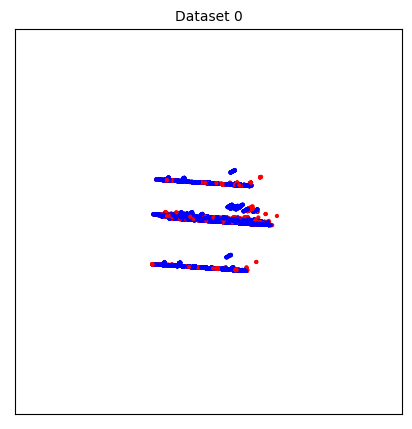

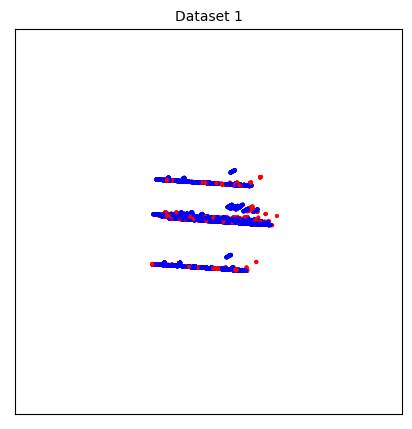

In [56]:
for n, data_x in enumerate(dados_plot_dados):

    # Ajustamos o modelo aos dados e realizamos a previsão
    modelo_lof.fit(dados_plot_dados[0])
    previsao = modelo_lof2.fit_predict(dados_plot_dados[0])

    fig, eixo = plt.subplots(figsize=(5, 5))

    eixo.scatter(
        dados_plot_dados[0][:, 0],
        dados_plot_dados[0][:, 1],
        s=4,
        color=CORES[(previsao + 1) // 2],
    )

    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dataset {n}", fontsize=10)

    # plota a borda entre as regiões de outlier/inlier
    if COM_BORDA_DE_PREVISAO:
        xx, yy = np.meshgrid(
            np.linspace(-8, 8, 150),
            np.linspace(-8, 8, 150),
        )
        Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    plt.show()

# Comparando os métodos

Embora o *LOF* possua alta complexidade de tempo, o método tem um ótimo desempenho na detecção de valores discrepantes locais. Então, comparando visualmente, é observado que os pontos anômalos foram melhor distribuídos nesse processo.